# TBS

## preparing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import hddm
import numpy as np
import pickle
from patsy import dmatrices, dmatrix, demo_data
cm = 1/2.54

/home/bsliang/miniconda3/envs/bsliang_DDM_27/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## loading data

In [2]:
data = hddm.load_csv('exp2_DDM.csv')
data.at[data['step_att'].isin(['4']),'step_att']=2
data.at[data['step_att'].isin(['5']),'step_att']=1
data = hddm.utils.flip_errors(data)
data.head(10)

,subj_idx,group_idx,turn_type,task_type,snr_type,trial_num,step_att,response,rt,step_unatnd
0,55,Larynx,Left iTBS,Tone,Clear,1,3,1,1.083317,1
1,55,Larynx,Left iTBS,Tone,Clear,2,2,1,0.744397,1
2,55,Larynx,Left iTBS,Tone,Clear,3,2,1,0.732525,1
3,55,Larynx,Left iTBS,Tone,Clear,4,1,1,0.800199,1
4,55,Larynx,Left iTBS,Tone,Clear,5,2,1,0.753649,1
5,55,Larynx,Left iTBS,Tone,Clear,6,2,1,0.544652,1
6,55,Larynx,Left iTBS,Tone,Clear,7,1,1,0.621313,1
7,55,Larynx,Left iTBS,Tone,Clear,8,1,1,0.580819,1
8,55,Larynx,Left iTBS,Tone,Clear,9,1,0,-0.496794,1
9,55,Larynx,Left iTBS,Tone,Clear,10,3,1,0.863869,1


## left stim, consonant, clear

### preparing data

In [3]:
D_L=data.loc[data['turn_type'].isin(['Left cTBS','Sham'])]
D_L_C=D_L.loc[D_L['task_type']=='Cons']
D_L_C_Q=D_L_C.loc[D_L_C['snr_type']=='Clear']
print(D_L_C_Q)
D_L_C_Q.to_csv('Exp2_D_L_C_Q_cTBS.csv')

       subj_idx group_idx  turn_type task_type snr_type  trial_num  step_att  \
780          55    Larynx  Left cTBS      Cons    Clear          1         2   
781          55    Larynx  Left cTBS      Cons    Clear          2         2   
782          55    Larynx  Left cTBS      Cons    Clear          3         1   
783          55    Larynx  Left cTBS      Cons    Clear          4         1   
784          55    Larynx  Left cTBS      Cons    Clear          5         1   
785          55    Larynx  Left cTBS      Cons    Clear          6         1   
786          55    Larynx  Left cTBS      Cons    Clear          7         2   
787          55    Larynx  Left cTBS      Cons    Clear          8         3   
788          55    Larynx  Left cTBS      Cons    Clear          9         2   
789          55    Larynx  Left cTBS      Cons    Clear         10         2   
790          55    Larynx  Left cTBS      Cons    Clear         11         3   
791          55    Larynx  Left cTBS    

### baseline model

In [4]:
a_reg = {'model': "a ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_L_C_Q_bsl = hddm.HDDMRegressor(D_L_C_Q, reg_descr, include='z')
D_L_C_Q_bsl.find_starting_values()
D_L_C_Q_bsl.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['v_Intercept', "v_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['z_Intercept', "z_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]


/home/bsliang/miniconda3/envs/bsliang_DDM_27/lib/python2.7/site-packages/scipy/optimize/optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2001 of 2000 complete in 3937.1 sec

### model 1: a only

In [5]:
a_reg = {'model': "a ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_L_C_Q_am = hddm.HDDMRegressor(D_L_C_Q, reg_descr, include='z')
D_L_C_Q_am.find_starting_values()
D_L_C_Q_am.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "a_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['v_Intercept', "v_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['z_Intercept', "z_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 4585.1 sec

### model 2: v only

In [6]:
a_reg = {'model': "a ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_L_C_Q_vm = hddm.HDDMRegressor(D_L_C_Q, reg_descr, include='z')
D_L_C_Q_vm.find_starting_values()
D_L_C_Q_vm.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['v_Intercept', "v_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "v_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['z_Intercept', "z_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 4428.3 sec

### model 3: z only

In [7]:
a_reg = {'model': "a ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_L_C_Q_zm = hddm.HDDMRegressor(D_L_C_Q, reg_descr, include='z')
D_L_C_Q_zm.find_starting_values()
D_L_C_Q_zm.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['v_Intercept', "v_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['z_Intercept', "z_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "z_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 4596.3 sec

### model 4: a + v

In [8]:
a_reg = {'model': "a ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_L_C_Q_avm = hddm.HDDMRegressor(D_L_C_Q, reg_descr, include='z')
D_L_C_Q_avm.find_starting_values()
D_L_C_Q_avm.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "a_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['v_Intercept', "v_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "v_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['z_Intercept', "z_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 4911.0 sec

### model 5: a + z

In [9]:
a_reg = {'model': "a ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_L_C_Q_azm = hddm.HDDMRegressor(D_L_C_Q, reg_descr, include='z')
D_L_C_Q_azm.find_starting_values()
D_L_C_Q_azm.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "a_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['v_Intercept', "v_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['z_Intercept', "z_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "z_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 5178.9 sec

### model 6: v + z

In [10]:
a_reg = {'model': "a ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_L_C_Q_vzm = hddm.HDDMRegressor(D_L_C_Q, reg_descr, include='z')
D_L_C_Q_vzm.find_starting_values()
D_L_C_Q_vzm.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['v_Intercept', "v_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "v_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['z_Intercept', "z_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "z_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 4968.3 sec

### model 7: a + v + z

In [11]:
a_reg = {'model': "a ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_L_C_Q_fm = hddm.HDDMRegressor(D_L_C_Q, reg_descr, include='z')
D_L_C_Q_fm.find_starting_values()
D_L_C_Q_fm.sample(2000, burn=20, dbname='traces.db', db='pickle')
D_L_C_Q_fm.save('D_L_C_Q_fm')

Adding these covariates:
['a_Intercept', "a_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "a_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['v_Intercept', "v_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "v_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['z_Intercept', "z_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "z_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 5593.0 secWARNING: Will not save custom link functions.


### Model comparison

baseline model DIC: 3200.695108
a model DIC: 3033.619810
v model DIC: 2771.976376
z model DIC: 3087.116629
av model DIC: 2503.074162
az model DIC: 2773.795731
vz model DIC: 2773.619338
full model DIC: 2494.362665


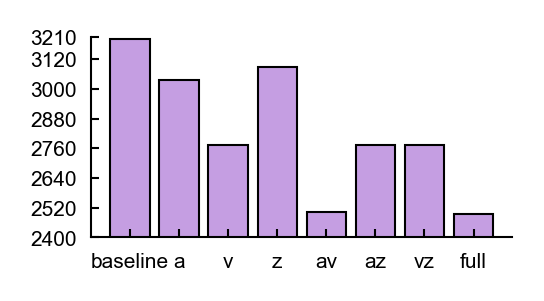

In [17]:
print("baseline model DIC: %f" % D_L_C_Q_bsl.dic)
print("a model DIC: %f" % D_L_C_Q_am.dic)
print("v model DIC: %f" % D_L_C_Q_vm.dic)
print("z model DIC: %f" % D_L_C_Q_zm.dic)
print("av model DIC: %f" % D_L_C_Q_avm.dic)
print("az model DIC: %f" % D_L_C_Q_azm.dic)
print("vz model DIC: %f" % D_L_C_Q_vzm.dic)
print("full model DIC: %f" % D_L_C_Q_fm.dic)

fig, ax = plt.subplots()

fruits = ['baseline', 'a', 'v', 'z', 'av', 'az', 'vz','full']
counts = [D_L_C_Q_bsl.dic, D_L_C_Q_am.dic, D_L_C_Q_vm.dic, D_L_C_Q_zm.dic,D_L_C_Q_avm.dic,D_L_C_Q_azm.dic,D_L_C_Q_vzm.dic,D_L_C_Q_fm.dic]

D_name='D_L_C_Q'

ax.bar(fruits, counts,color=[197./255,158./255,226./255],edgecolor='black',linewidth=0.5)

plt.rcParams['savefig.dpi']=300
plt.rcParams['axes.linewidth']=0.5

#ax.set_ylabel('DIC value')
#ax.set_title('TBS: Left cTBS consonant quiet')
ax.set_ylim([2400,3210])
ytick_plot=range(2400,3210,120)
ytick_plot.append(3210)
ax.set_yticks(ytick_plot)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.set_size_inches(4.6*cm,2.25*cm)
ax.tick_params('both',which='major',direction='in',width=0.5,length=2)
plt.rcParams['font.size']=5
plt.rcParams['font.family']='Arial'
plt.savefig(D_name+'_interact_M_compare.pdf',bbox_inches = 'tight',transparent=True)
plt.show()

### Plotting

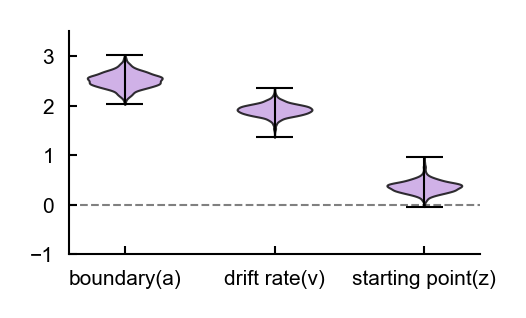

('P(a > Sham) = ', 1.0)
('P(v > Sham) = ', 1.0)
('P(z > Sham) = ', 0.997979797979798)


In [13]:
a_Intercept,a_cTBS = D_L_C_Q_fm.nodes_db.loc[["a_Intercept","a_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]"], 'node']
# hddm.analyze.plot_posterior_nodes([a_Intercept,a_cTBS])
# plt.xlabel('boundary')
# plt.ylabel('Posterior probability')
# plt.title('Full model')

v_Intercept,v_cTBS = D_L_C_Q_fm.nodes_db.loc[["v_Intercept","v_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]"], 'node']
# hddm.analyze.plot_posterior_nodes([v_Intercept,v_cTBS])
# plt.xlabel('drift-rate')
# plt.ylabel('Posterior probability')
# plt.title('Full model')

z_Intercept,z_cTBS = D_L_C_Q_fm.nodes_db.loc[["z_Intercept","z_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]"], 'node']
# hddm.analyze.plot_posterior_nodes([z_Intercept,z_cTBS])
# plt.xlabel('starting point')
# plt.ylabel('Posterior probability')
# plt.title('Full model')

fig, ax = plt.subplots()
fig.set_size_inches(4.5*cm,2.5*cm)

para_tag=['boundary(a)','drift rate(v)','starting point(z)']
counts = [a_cTBS.trace()/(max(a_cTBS.trace())-min(a_cTBS.trace())),v_cTBS.trace()/(max(v_cTBS.trace())-min(v_cTBS.trace())),z_cTBS.trace()/(max(z_cTBS.trace())-min(z_cTBS.trace()))]

ax.axhline(y = 0, color =[0.5,0.5,0.5], linestyle ="--", linewidth = 0.5, zorder=0)

vioparts=ax.violinplot(counts)
for pc in vioparts['bodies']:
    pc.set_facecolor([197./255,158./255,226./255])
    pc.set_edgecolor('black')
    pc.set_linewidth(0.5)
    pc.set_alpha(0.8)
vioparts['cbars'].set_color('black')
vioparts['cbars'].set_linewidth(0.5)
vioparts['cmaxes'].set_color('black')
vioparts['cmaxes'].set_linewidth(0.5)
vioparts['cmins'].set_color('black')
vioparts['cmins'].set_linewidth(0.5)

ax.set_xticks([1,2,3])
ax.set_xticklabels(para_tag)
#ax.set_title('Full model: Left cTBS consonant quiet')
#ax.set_ylabel('Regression coef (normalized)')
ax.set_ylim([-1,3.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params('both',which='major',direction='in',width=0.5,length=2)
plt.rcParams['savefig.dpi']=300
plt.rcParams['font.size']=5
plt.rcParams['font.family']='Arial'
plt.savefig(D_name+'_interact_cTBS_DDMparas.pdf',bbox_inches = 'tight',transparent=True)
plt.show()

print("P(a > Sham) = ", (a_cTBS.trace() > 0).mean())
print("P(v > Sham) = ", (v_cTBS.trace() > 0).mean())
print("P(z > Sham) = ", (z_cTBS.trace() > 0).mean())

### check full model simulation prediction accuracy

#### fit the full model

In [14]:
fm_data_2=D_L_C_Q
fm_data_2.reset_index(inplace = True, drop = True)
a_reg = {'model': "a ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
fm_2 = hddm.HDDMRegressor(fm_data_2, reg_descr, include='z')
fm_2.find_starting_values()
fm_2.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "a_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['v_Intercept', "v_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "v_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['z_Intercept', "z_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "z_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 5620.0 sec

#### predict data from simulated data derived from full model

In [15]:
fm_data_2_sim = hddm.utils.post_pred_gen(fm_2)
hddm.utils.post_pred_stats(fm_data_2, fm_data_2_sim)

 [-------------------112%-------------------] 28 of 25 complete in 24345.3 sec

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.657692,0.668377,0.110949,0.000114,0.012424,True,43.591999,0.096307
mean_ub,0.605000,0.637127,0.100716,0.001032,0.011176,True,39.040001,0.318992
std_ub,0.238757,0.224880,0.056591,0.000193,0.003395,True,64.608002,0.245227
10q_ub,0.406351,0.438566,0.081494,0.001038,0.007679,True,25.559999,0.395298
30q_ub,0.494294,0.495861,0.084136,0.000002,0.007081,True,47.256001,0.018623
50q_ub,0.561459,0.568064,0.092086,0.000044,0.008523,True,48.431999,0.071732
70q_ub,0.647337,0.679703,0.108900,0.001048,0.012907,True,42.551998,0.297204
90q_ub,0.836489,0.925203,0.156723,0.007870,0.032432,True,34.520000,0.566053
mean_lb,-0.657797,-0.645109,0.104471,0.000161,0.011075,True,41.632000,0.121454
